Ссылки на статьи, которые, возможно, стоит изучить подробнее
https://habr.com/ru/companies/skillfactory/articles/526972/

# Основы статистики

[Справка по математическим символам (LaTeX/Mathematics)](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

Импорт модулей

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Введение

Обычно, размер исследуемых объектов(генеральная совокупность) слишком велик, поэтому исследователь отбирает часть данных(формирует выборку), которая должна быть моделью, отражать природу и  свойства (репрезентативная выборка) исследуемого набора данных. Затем исследователь обощает результаты на всю генеральную совокупность. 

### 1.2 Генеральная совокупность и выборка.

**Генеральная совокупность**\
множество всех объектов, относительно которых будем делать выводы в рамках исследования некоторой научной проблемы. (множество всех объектов на которые мы хотели бы обобщить исследование)

**Выборка**\
это метод исследования, когда из общей изучаемой (генреральной) совокупности однородных единиц отбирается некоторая её часть (выборочная совокупность) и только эта часть подвергается обследованию.

**Репрезентативная выборка**\
это часть целевой аудитории, которая отражает ключевые характеристики всей совокупности пользователей (пол, возраст, местоположение, интересы).\
Выборка считается репрезентативной, когда по выбранной маленькой группе можно судить о более широкой аудитории. То есть когда свойства, присущие выбранной из целевой аудитории группы, можно распространить на всю целевую аудиторию. \
Допустимая погрешность при расчёте репрезентативной выборки варьируется в пределах 1-5%.


#### Способы формирования выборок

**Простая случайная выборка(simple random sample)**\
Чтобы её сформировать мы случайным образом начинаем выбирать элементы генеральной совокупности для участия в нашем эксперименте или исследовании (репрезентативная)

In [2]:
# Load a sample dataframe
df = pd.read_csv('data/digital_marketing_campaign_dataset.csv')

# Select 10 random rows
sample_df = df.sample(frac=0.1) # or n = 10

sample_df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
7838,15838,47,Male,114319,Social Media,Retention,6027.952878,0.137697,0.061689,2,6.124357,3.484318,88,11,5,6,2160,IsConfid,ToolConfid,0
5190,13190,30,Female,137068,Social Media,Retention,7466.166647,0.083855,0.085248,0,1.971116,4.773280,38,13,0,0,4939,IsConfid,ToolConfid,0
1797,9797,42,Female,144928,PPC,Conversion,2981.763923,0.222638,0.127737,26,5.119661,10.732514,24,14,9,3,2560,IsConfid,ToolConfid,1
2496,10496,61,Female,55732,Email,Consideration,769.585274,0.250887,0.163882,28,3.157503,7.912365,49,3,9,0,2908,IsConfid,ToolConfid,1
4798,12798,65,Female,63388,Email,Conversion,2259.467593,0.124520,0.091689,6,8.743571,2.595658,20,1,8,7,4707,IsConfid,ToolConfid,1


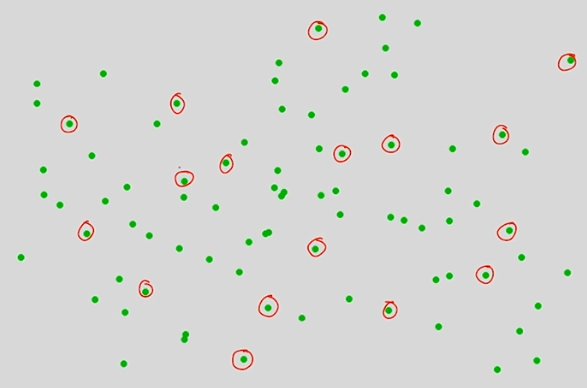

**Стратифицированная выборка**\
Перед тем, как случайным образом извлекать элементы генеральной совокупности для нашего исследования, мы сначала разобъем генеральную совокупность на несколько обособленных и различных по своей природе групп(страт)

In [3]:
df_male = df.loc[df['Gender'] == 'Male', :]\
            .sample(n=5)
df_female = df.loc[df['Gender'] == 'Female', :]\
            .sample(n=5)

In [4]:
frames = [df_male, df_female]
sample_df2 = pd.concat(frames)
sample_df2

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
2837,10837,43,Male,131056,Email,Consideration,5263.125602,0.107863,0.186830,25,1.695480,4.836033,9,2,8,7,4676,IsConfid,ToolConfid,1
5897,13897,26,Male,48897,SEO,Retention,9886.590740,0.248171,0.188015,15,1.972627,13.002989,33,10,5,5,3236,IsConfid,ToolConfid,1
7355,15355,20,Male,66623,Referral,Consideration,231.766993,0.090971,0.118346,11,4.464492,0.811698,83,13,6,6,2945,IsConfid,ToolConfid,1
5087,13087,50,Male,109288,Referral,Conversion,2731.365288,0.195036,0.140555,12,6.839227,7.006759,78,6,5,1,4917,IsConfid,ToolConfid,1
2657,10657,35,Male,52228,SEO,Retention,356.084109,0.125258,0.147593,1,6.463811,9.879321,85,8,6,7,4066,IsConfid,ToolConfid,1
2322,10322,27,Female,80805,PPC,Retention,2592.581729,0.073887,0.081352,29,2.435773,3.898750,16,17,0,8,2637,IsConfid,ToolConfid,0
2341,10341,48,Female,60888,PPC,Retention,4289.431029,0.017248,0.049704,38,6.464584,10.170253,17,14,0,9,2422,IsConfid,ToolConfid,1
1854,9854,40,Female,91257,SEO,Consideration,9940.689378,0.243158,0.125244,6,3.111068,2.353296,90,7,4,8,3677,IsConfid,ToolConfid,1
5236,13236,50,Female,141265,SEO,Retention,8899.968163,0.027497,0.152687,37,9.984040,13.710489,60,9,1,0,1842,IsConfid,ToolConfid,1
1931,9931,49,Female,107236,PPC,Awareness,738.947034,0.119367,0.175915,21,7.583371,4.856206,57,5,2,0,2197,IsConfid,ToolConfid,0


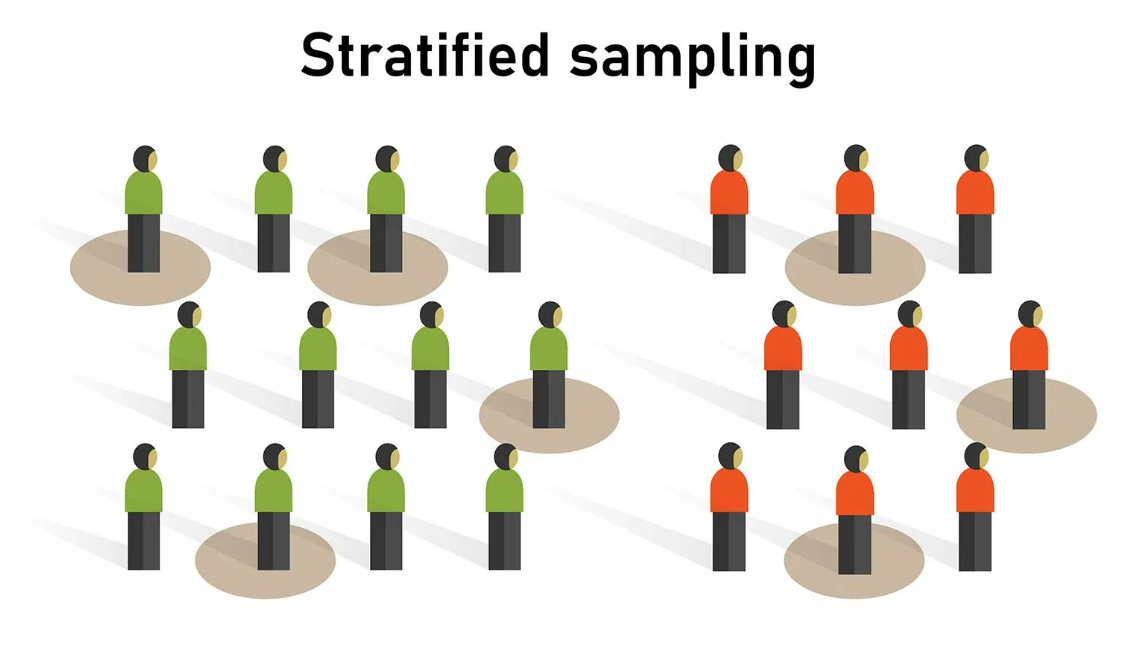

**Групповая выборка(claster sample)**\
Генеральная совокупность разделяется на несколько групп(кластеров), однако в данном случае все кластеры, напротив будут очень сильно похожи между собой. Способ используется для экономии ресурсов и времени при формировании выборки. Пример: делим Санкт-Петербург на несколько географических районов и можем быть уверены в том, что население данных районов сильно не оличается друг от друга. Затем отбираем несколько кластеров и методом случайной выборки формируем из них набор элементов для исследования.

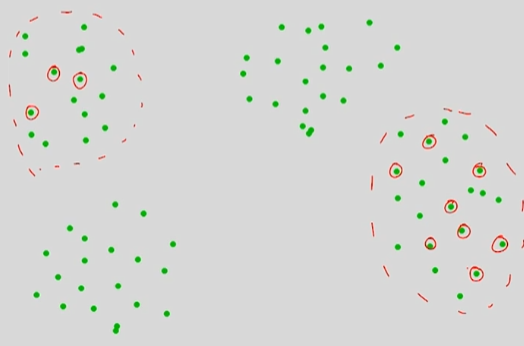

In [5]:
gr_select = df.loc[df['CampaignType'] == 'Consideration']

Разбиение на кластеры

In [6]:
cluster_1, cluster_2 = train_test_split(gr_select, test_size=0.5, train_size=0.5,
                 random_state=235)

In [7]:
cluster_1, cluster_2, cluster_3, cluster_4 = train_test_split(
    cluster_1, cluster_2,
    test_size=0.5,
    train_size=0.5,
    random_state=235)


In [8]:
for el in [cluster_1, cluster_2, cluster_3, cluster_4]:
    print(el.shape[0], end=' ')

497 497 497 497 

In [9]:
cluster_1 = cluster_1.sample(10)
cluster_4 = cluster_4.sample(10)

In [10]:
cluster_1.shape, cluster_2.shape

((10, 20), (497, 20))

---

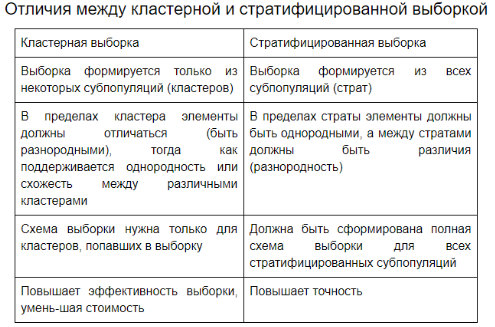

### 1.3. Типы переменных. Количественные и номинативные переменные

|Типы переменных|Подтипы|Описание|Пример|
|:---|:---:|:---|:---|
| Количественные | | Измеренное значение некоторого признака | Рост |
| | непрерывные | Может принимать любое значение на промежутке | Рост может принимать любое значение на промежутке от 160 до 190 см |
| | дискретные | Может принимать только определённые значения | число детей в семье: 1, 2, 3. А 3,5 ребёнка быть не может |
| Качественнные | | | |
| | номинативные/Категориальные | Нужны для разделения испытуемых на группы. За номинативными переменными не стоит никакого математического смысла (классификация). Цифры - это имена групп | Все участники женского пола обозначены цифрой 1, а мужского 2 (1 - ж, 2 - м) |
|  | ранговые | переменные, в которых можно установить порядок между значениями. Единственная математическая операция, допустимая в данном случае это сравнение. Но ни на сколько, ни во сколько сказать нельзя. Количественные переменные, такие, как возраст, доход, также можно использовать в качестве ранговых | оценки с значениями "плохо", "средне", "хорошо" или инофрмация а марафонском забеге, где каждому участнику присваивается место |

### 1.4 Меры центральной тенденции

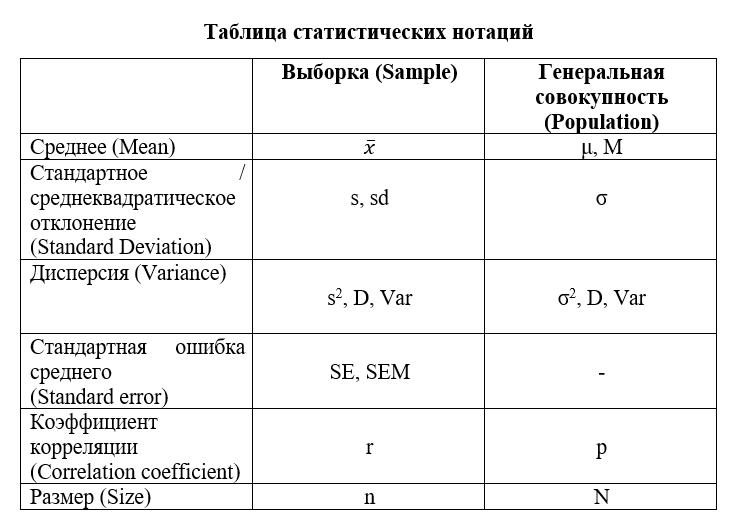

| Мера | Описание | Пример |
| :--- | :--- | :--- |
| Мода | значение измеряемого признака, которое встречается максимально часто |  |
| Медиана | значение признака, которое делит упорядоченное множество пополам |  |
| Среднее значение (mean) | сумма всех значений измеренного признака, деленная на количество измеренных значений |  |


> Если распределение симметрично, унимодально и не имеет заметных выбросов - можно использовать любую из мод центральной тенденции. Однако, если есть ассеметрия, заметны выбросы или несколько мод, тогда использование среднего значения может привести нас к некооректному результату и гораздо лучше использовать моду или медиану для того, чтобы охарактеризовать данные с точки выраженности некоторого количественного признака.

**Свойства среднего**
1. Если к каждому значению нашей выборки прибавить определённое число, то и среднее значение также увеличиться на это число;
2. Если мы каждое значение умножим на некоторое число, то и среднее значение также увеличиться в это же число раз;
3. Если мы для каждого значения в выборке рассчитаем такой показатель, как его отклонение от среднего арифметического, то сумма этих отклонений будет равняться 0;
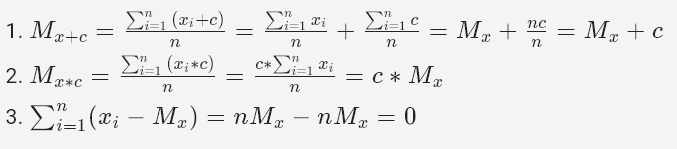

В ситуации унимодального и симметричного распределения именно среднее арифметическое очень часто используется в статистике и как в качестве меры центральной тенденции и для решения более интересных задач. 

### 1.5 Меры изменчивости

**Размах**

Размах (Range) - это разность максимального и минимального значения.

$R = X_{max} - X_{min}$

**Дисперсия**

Дисперсия (variance) - средний квадрат отклонений индивидуальных значений признака от их средней величины. (в квадрат возводят для того, чтобы положительное и отрицательные смещения не компенсировали друг друга)

$\Large D = \frac{\sum_{} (x_{i} - \bar{x})^2}{n}$

При этом показатель дисперсии будет превышать реальные средние отклонения наших наблюдений от среднего по выборке 

**Среднее квадратическое отклонение (СКО)**\
Чтобы вернуться к исходным единицам измерения, найдём корень из дисперсии - этот показатель называется среднее квадратическое отклонение (СКО)


| Размер данных | Формула | Примечание |
| :--- | :--- | :--- |
| генеральная совокупность | $\Large\sigma=\sqrt{\frac{\sum_{} (x_{i} - \bar{x})^2}{n}}$ | |
| выборка | $\Large sd=\sqrt{\frac{\sum_{} (x_{i} - \bar{x})^2}{n-1}}$ | Учитываем степени свободы и корректируем значение с помощью n - 1 |


**Свойства дисперсии**

> Если к каждому наблюдению выборки, прибавить некоторое число в таком случае ни дисперсия, ни стандартное отклонение нового распределия не изменится и не будет отличаться от предидущего значения.
> 
> $\large D_{x+c} = D_x$ 
> 
> $\large sd_{x+c} = sd_x$
>
> 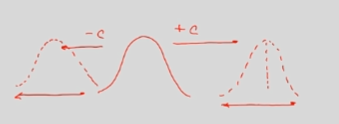

> Если значение каждого признака умножить на некоторое число, отличное от 0 и 1, то распределение будет более широким. Изменчивость данных увеличиться.
> 
> $\large D_{x*c} = D_x * c^2$
>
>$\large sd_{x*c} = sd_x*c$
>
> 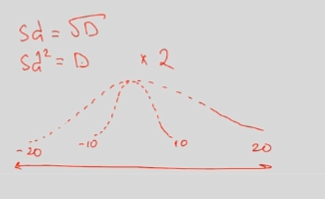


### 1.6 Квартили распределения и график box-plot

| Понятие | Определение |
| :--- | :--- |
| Квантили распределения | это такие значения признака, которые делят упорядченные данные на некоторое число равных частей |
| Квартили распределения | это такие три точки, которые делят наши данные на четыре(4)   равные части |

**Кваритили**

> Делим данные пополам медианой, затем каждую половину еще раз медианой пополам. 
Используя квартили, можно легко описать наше распределение и построить график box-plot

**Box plot (ящик с усами)**

> Он позволяет визиуализировать обширную информацию о данных. Описание ящика:
> -  центром графика является медиана значений или 2-ой квартиль наших данных;
> -  верхняя граница - это 3-ий квартиль;
> -  нижняя граница - это 1-ый квартиль.
>   
> Расстояние между 1 и 3 квартилем называется межквартильный размах - используется в качестве одной из мер изменчивости. Чем больше межквартильный размах, там больше вариативность признака.
>
> Отложим 1,5 межквартильного размаха вверх и вниз от границ межквартильного размаха, те значения признака которые последними принадлежат этому промежутку и будут границами усов графика.
>
> Точки за пределами границ являются выбросами
>
> 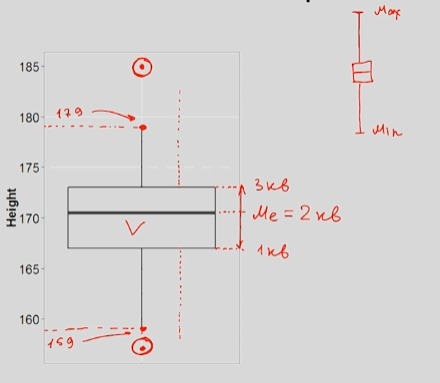

> 50% наблюдений окажется между первым и третьим квартилем, остальные окажутся в интервале усов,  а те, что будут за границами усов - это данные, которые значительно отличаются от остальных
> 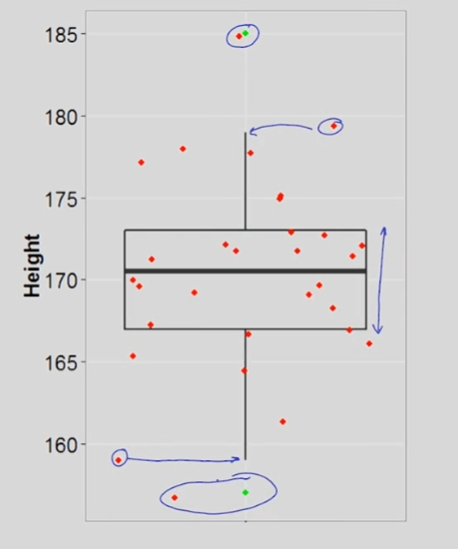

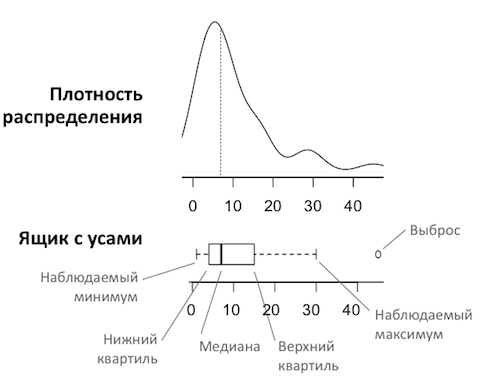

### 1.7 Нормальное распределение

- это унимодальное и симметричное распределение, отклонения от среднего равновероятны и подчиняются определённому равновероятностному закону:
    -  в диапазоне от среднего ($\mu$) до одного стандартного отклонения ($1\sigma$) будут находиться приблизиительно 34.1 % всех наблюдений;
    -  в диапазоне от $1\sigma$ до $2\sigma$ - примерно 13.6% всех наблюдений;
    -  в диапазоне от $2\sigma$ до $3\sigma$ - примерно 2.1% всех наблюдений;
    -  свыше $3\sigma$ - 0.1% всех наблюдеий.

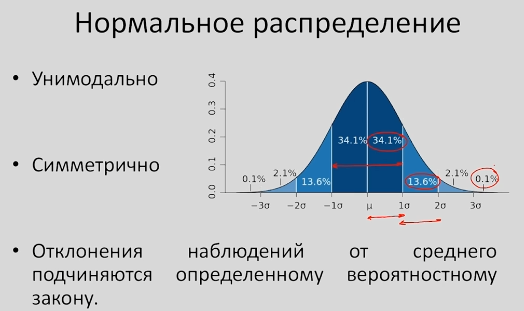

В природе большое количество характеристик реально распределены нормальным образом.

**Z-стандартизация**

- это такое преобразование наших данных, которое позволяет нам любую шкалу перевести в следующий тип(Z-шкалу/Z-scores), где среднее значение будет равняться 0 ($M_z = 0$), а  дисперсия будет равняться 1 ($D_z = 1$).

> для преобразования в Z шкалу необходимо из каждого наблюдения в выборке отнять среднее значение по выборке и разделить на стандартное отклонение по выборке
> $ \large Z_i = \frac{x_i - \bar{X}}{sd}$

**Z-преобразование при работе с нормальным распределением**

Значения отклоняются от среднего с некоторым вероятностным законом. Этот вероятностный закон называют правилом двух и трех сигм.

**Правило "двух" и "трех" сигм (стандартное отклонение)**\
В диапазоне $M_x$(среднее) $\pm \sigma$(стандартное отклонение) находиться примерно
- $\large M_x \pm \sigma \approx 68$% наблюдений
- $\large M_x \pm 2\sigma \approx 95$% наблюдений
- $\large M_x \pm 3\sigma \approx 100$% наблюдений

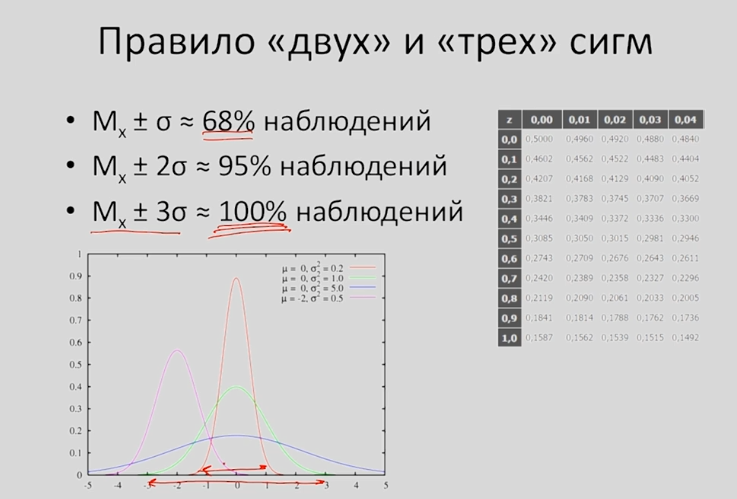


**Z-преобразование** позволяет ответить на вопрос какой процент наблюдений лежит в абсолютно любом интересующем нас диапазоне

Задача:\
$\bar{X} = 150$\
$sd = 8$

Какой процент наблюдений превосходит значение равное 154\
Для начала можно использовать Z-преобразование

$\large Z = \frac{154-150}{8} = 0,5$

По таблице находим\
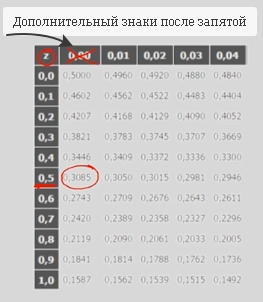

Что в диапазоне, превышающем 154 или 0,5 по Z-шкале, находится приблизительно 30%(0,3085) наблюдений.

На языке вероятностей:\
Вероятность встретить значение, превосходящее 0,5 в Z-шкале, составляет приблизительно 0,3.    


Таблицы z-значений

- [процент наблюдений, не превышающий указанное z-значение](https://web.archive.org/web/20180729102938/http://users.stat.ufl.edu/~athienit/Tables/Ztable.pdf)
- [процент наблюдений, превышающий указанное z-значение](http://www.normaltable.com/ztable-righttailed.html%C2%A0%20)
- [вычислить процент наблюдений в интересующем нас диапазоне](https://gallery.shinyapps.io/dist_calc/)

**Задача**

Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112?

**Решение**
1. Количество людей с IQ ниже 70: (|70-100|)/15 = -2,0, по таблице = 2,28%
2. Количество людей с IQ выше 112: (|112-100|)/15 = 0,8, по таблице = 21,19%
3. Нас интересуют те значение, которые не попали в указанные выше интервалы, т.е. 100-2,28-21,19 = 76,53%.


### 1.8 Центральная предельная теорема (ЦПТ)

> Исследуемый признак имеет нормальное распределение в генеральной совокупности с некоторым среднем значением и стандартным отклонением и мы многократно извлекаем выборки, равного n по объёму и в каждой выборке рассчитываем среднее значение, после чего строим распеределение этих выборочных средних. Так вот такое распределение будет являться нормальным со средним совпадающим с этим показателем генеральной совокупности и со стандартным отклонением этого распределения $SE$ (стандартная ошибка среднего)
> 
>$\large SE = \frac{\sigma}{\sqrt{n}}$
>- $SE$ - стандартная ошибка среднего;
>- $\sigma$ - стандартное отклонение признаков генеральной совокупности;
>- $n$ - число наблюдений.

> Если число наблюдений больше 30 при чём это выборка представляет собой репрезентативную выборку, то справедливо следующее:\
>$\large SE = \frac{\sigma}{\sqrt{n}} = \frac{sd_x}{\sqrt{n}}$
>
> - $sd_x$ - стандартное отклонение выборки

### 1.9 Доверительные интервалы для среднего

Знания центральной предельной теоремы для решени задачи нахождения доверительных интервалов для средних значений


Доверительный интервал
- это интервал, в пределах которого с заданной вероятностью лежат выборочные оценки статистических характеристик генеральной совокупности.

Рассчёт 95% доверительного интервала для среднего генеральной совокупности по одной выборке:
- $\bar{X} \pm 1.96*SE$

P.s. коэффициент 1.96 берётся из таблицы

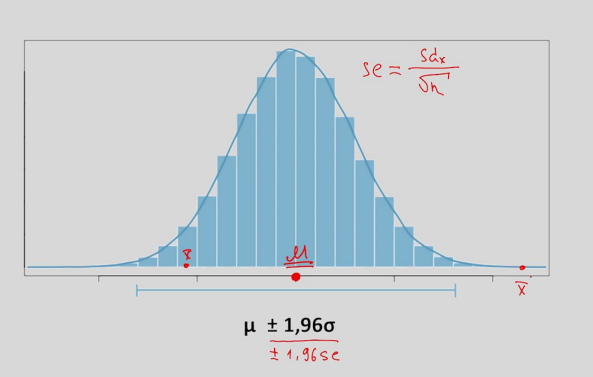

In [11]:
def standard_error(sd, n):
    return sd/(n**0.5)

def confidence_interval(sd, n, X, interval_size = 95):
    tab_of_coef = {95: 1.96, 99: 2.58}
    coef = tab_of_coef[interval_size]
    se = standard_error(sd, n)
    return X - coef * se, X + coef * se

In [ ]:
130 = 136 - 2.58 * se
-6 = -2.58 * se
se = 6/2.58

In [3]:
6/2.58

2.3255813953488373

In [12]:
sd = 4
n = 64
X = 18.5 # среднее значение выборки (X)

In [13]:
confidence_interval(sd, n, X)

(17.52, 19.48)

In [14]:
confidence_interval(5, 100, 10, 99)

(8.71, 11.29)

### 1.10 Идея статистического вывода, p-уровень значимости

Предположим, что на выздоровление при некотором заболевании в среднем требуется 20 дней, однако мы разработали новый препарат и хотим проверить сократится ли этот срок.

1. Необходимо сформировать 2 гипотезы:
     - $H_0$ обычно формулируется как отсутствие различий при введении новых данных(при использовании препарата), которые могут повлиять на эксперимент;
     - $H_1$ формулируется как появлений различий(при использовании препарата) в эксперименте;

2. Предположим, что верна нулевая гипотеза($H_0$), тогда в соответствии  Централььной Предельной Теоремой, если бы мы многократно повторяли наше исследование, то выборочные средние распределились бы нормальным образом, вокруг среднего генеральной совокупности и со стандартной ошибкой среднего $\large SE = \frac{sd}{\sqrt{n}}$

4. Теперь нужно ответить на вопрос: на сколько наше выборочное среднее отклониловь от предполагаемого среднего значения генеральной совокупности в единицах стандартного отклонения. Для этого сделаем Z-преобразование $Z = \frac{\bar{X} - M}{SE}$
       


In [15]:
from math import sqrt
import scipy.stats as st

sp = 20
n = 64
mean = 18.5
std = 4

se = std / sqrt(n)
z_value = (mean - sp) / se
p_scope = st.norm.cdf(z_value)*2
p_scope

0.002699796063260186

In [17]:
from scipy.stats import norm
print(norm.ppf(0.95))
print(norm.cdf(1.6448536269514722))

1.6448536269514722
0.95


In [2]:
a = 0.5, 0
b = 2, 1

cos_f = (
    (a[0] * b[0] + a[1] * b[1])/
    ((a[0]**2 + a[1]**2)**0.5 * (b[0]**2 + b[1]**2)**0.5)
)
round(cos_f, 4)

0.8944

In [6]:
def stand_error(sd, n):
    return sd / n ** 0.5


def z_transform(X, M, sd, n):
    return (X - M)/stand_error(sd, n)



In [7]:
M = 115
X = 118
n = 144
sd = 9

In [8]:
z_transform(X, M, sd, n)

4.0

In [9]:
stand_error(sd, n)

0.75

## Сравнение средних

### 2.1 Т-распределение

> Распределение Стьюдента используется:
> - число наблюдений < 30;
> - $\sigma$ (стандартное отклонение генеральной совокупности) неизвестно;
>
>  Чтобы описать как будут себя вести все выборочные средние.

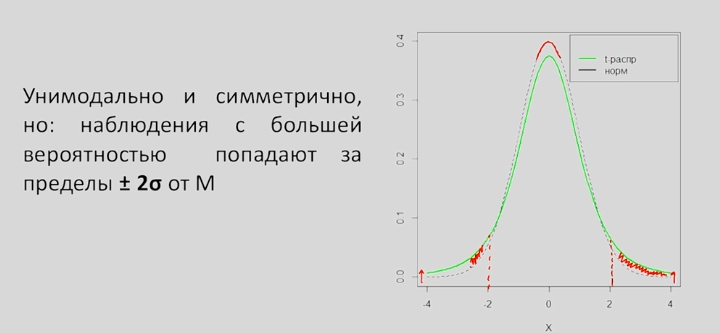

> Очень важным параметром t-распределения(Стьюдента) является число степеней свободы, которое зависит от количества наблюдений в нашей выборке.
> Количество степеней свободы определяется как $df = n - 1$. От количества степеней свободы зависит "Форма" распределения. С увеличением числа df распределение стремится к нормальному.

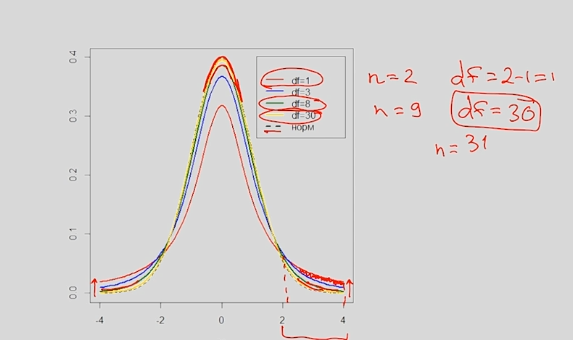


#### 2.2 Сравнение двух средних. t-критерий Стьюдента

Для сравнивания двух выборок между собой(двух выборочных средних) используется *парный t-тест*, именуемый также как *критерий t-Стьюдента*

---
Стандартная ошибка среднего для двух выборок рассчитывается как: 

$\large SE = \sqrt{\frac{sd_1^{2}}{n_1} + \frac{sd_2^{2}}{n_2}}$

Число степеней свободы для 2 выборок:\
$df = n_1 + n_2 - 2$

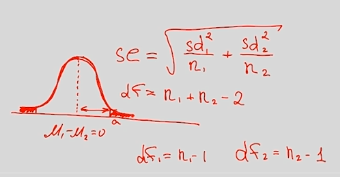

При условии, что нулевая гипотеза верна:

$H_0: M_1 = M_2$\
$H_1: M_1 \neq M_2$

t-критерий рассчитывается по формуле:

$\large t = \frac{(\bar{X_1} - \bar{X_2}) - (M_1 - M_2)}{\sqrt{\frac{sd_1^{2}}{n_1} + \frac{sd_2^{2}}{n_2}}}$

При условии, что нулевая гипотеза верна, выражение можно упростить:\
$\large t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{sd_1^{2}}{n_1} + \frac{sd_2^{2}}{n_2}}}$

P уровень значимости будет найден исходя из кол-ва степеней свободы и значения парного t-критерия

In [11]:
def t_criteria(sd, n, X):
    formula = 2.093 * (sd / n**0.5)
    return round(X - formula, 2), round(X + formula, 2)


In [12]:
sd = 11.3
n = 20
X = 89.9

t_criteria(sd, n, X)

(84.61, 95.19)